# Đồ án đồ án cuối kỳ môn "Lập trình song song"

Nhóm 17:
1. 18120625 - Nguyễn Trần Trung
2. 18120658 - Phạm Viết Xuân

## Mô tả ứng dụng

**Tên ứng dụng:** Thay đổi kích thước ảnh bằng phương pháp “seam carving”

### Input/output

**Input:** Một tấm ảnh RGB.

**Output:** Tấm ảnh được thay đổi kích thước mà không làm biến dạng các đối tượng quan trọng (ở đây ta chỉ thu hẹp chiều rộng lại).

Ảnh gốc:

![ocean](https://cloud.githubusercontent.com/assets/1958916/21791178/f934a906-d695-11e6-8166-052d6f35fab2.jpg) 

Ảnh sau khi thay đổi kích thước  với seam carving:

![ocean_result](https://cloud.githubusercontent.com/assets/1958916/21791177/f933f2cc-d695-11e6-833b-eb81243e44eb.jpg)

### Ý nghĩa trong thực tế

Một use case là ta có thể muốn có các phiên bản với các kích thước khác nhau của cùng một tấm ảnh để hiển thị trên các thiết bị khác nhau (máy tính, điện thoại,...).

### Ứng dụng có cần phải tăng tốc?

Cần, ứng dụng này chạy chậm khi cài đặt tuần tự.

## Xây dựng ứng dụng

### Cài đặt tuần tự

#### Thiết kế

#### Đánh giá

In [1]:
# Đoạn code Python để hiển thị file ảnh pnm ở notebook
# Ví dụ để hiển thị file "img.pnm", ở dòng cuối của code cell
# bạn gõ (không cần dấu ! đằng trước): show_pnm('img.pnm')
# LƯU Ý: bạn phải chạy cell này một lần thì mới gọi được hàm show_pnm
from PIL import Image
import numpy as np
def show_pnm(file_name):
  with open(file_name, 'r') as f:
    vals = f.read().split()
  w = int(vals[1])
  h = int(vals[2])
  if vals[0] == 'P2': # Grayscale
    pixels = np.array(vals[4:], dtype=np.uint8).reshape((h, w))
  elif vals[0] == 'P3': # RGB
    pixels = np.array(vals[4:], dtype=np.uint8).reshape((h, w, 3))
  else:
    return None
  
  return Image.fromarray(pixels)

# Đoạn code Python để hiển thị file chứa ma trận ở notebook
# (một dòng của ma trận ứng với một dòng trong file, 
# các phần tử trên mỗi dòng được cách nhau bởi khoảng trắng) 
# Ví dụ để hiển thị file "pixel_importance.txt", ở dòng cuối của code cell
# bạn gõ: show_matrix('pixel_important.txt')
def show_matrix(matrix_file):
  m = np.loadtxt(matrix_file)
  m = m + m.min()
  m = m / m.max()
  m = m * 255
  m = m.astype(np.uint8)
  return Image.fromarray(m)

In [2]:
from numba import cuda
major, minor = cuda.get_current_device().compute_capability
print(f'GPU compute capability: {major}.{minor}')

GPU compute capability: 7.5


In [14]:
!nvcc -arch=sm_{major}{minor} SeamCarving_device_2.cu -o SeamCarving

In [ ]:
!./SeamCarving mypnm.pnm 200 result.pnm

In [ ]:
!./SeamCarving mypnm.pnm 200 result.pnm

In [15]:
!./SeamCarving 15-In.pnm 1 result.pnm

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15843721216 byte
SMEM per SM: 65536 byte
SMEM per block: 49152 byte
****************************
Image size (width x height): 640 x 434


Seam Carving by host
Processing time (use host - convert image to grayscale): 2.249856 ms
Processing time (use host - detect edge): 73.840767 ms
Processing time (use host - find optimum seam): 6.209632 ms
Processing time (use host - remove seam): 425.513611 ms
Processing time (use host - summary): 508.405273 ms

Seam Carving by device
Processing time (use host - convert image to grayscale): 0.046080 ms
Processing time (use device - detect edge): 0.137664 ms
Processing time (use device - find optimum seam): 1.527840 ms
Processing time (use device - remove seam): 0.058688 ms
Processing time (use host - summary): 3.750144 ms


In [ ]:
!./SeamCarving 15-In.pnm 1 result.pnm

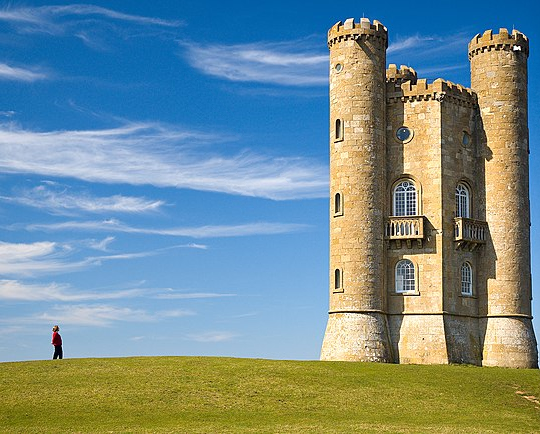

In [11]:
show_pnm("result_host.pnm")

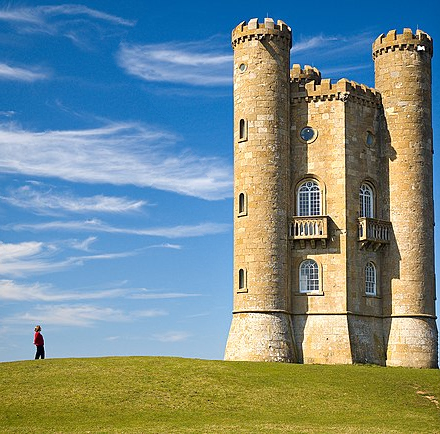

In [12]:
show_pnm("result_device.pnm")

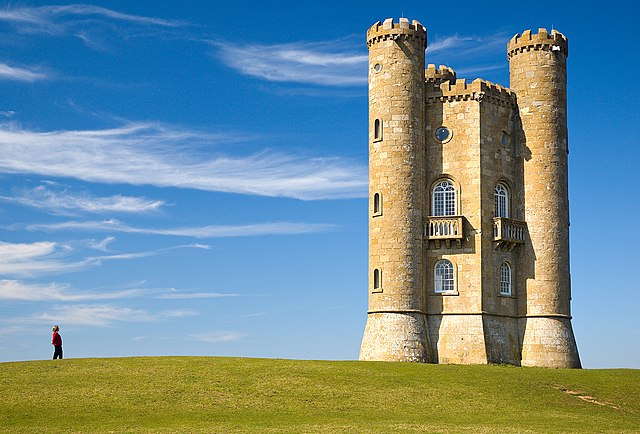

In [9]:
show_pnm("15-In.pnm")

In [43]:
import matplotlib.pyplot as plt

path = "/content/20211020_173703.png"
img = plt.imread(path)
if path.split(".")[-1] == "png":
    img = (img[:,:,:3] * 255).astype("uint8")
f = open("mypnm.pnm", "w")
f.write("P3\n{} {}\n255\n".format(img.shape[1], img.shape[0]))
for v in img.reshape(-1):
  f.write("{} ".format(v))
f.close()

In [ ]:
show_pnm("mypnm.pnm")

### Cài đặt song song

#### Phân tích

#### Thiết kế

#### Đánh giá

### Cài đặt song song + tối ưu hóa lần 1

#### Phân tích

#### Thiết kế

#### Đánh giá

### Cài đặt song song + tối ưu hóa lần 2

#### Phân tích

#### Thiết kế

#### Đánh giá

## Nhìn lại quá trình làm đồ án

## Tài liệu tham khảo

* https://en.wikipedia.org/wiki/Seam_carving
* https://github.com/dwxiao/seam-carving